In [1]:
import pandas as pd

data = pd.read_csv("/workspaces/Phuong5/dataset_1669242.csv")

data.head()

,ad_id,platform,impressions,engagements,reach,ctr,cvr
0,0e34a6e4-72c1-413b-acf7-999fc967ea2a,Twitter,152016,14138,40660.0,0.050098,0.029867
1,8d3ad67f-b54b-485c-b966-ff9b0813d054,Twitter,142519,11691,31560.0,0.043567,0.029978
2,8edd8dd6-9713-4b25-8eb3-ebee9df7775c,Twitter,69013,4372,15899.0,0.047753,0.027202
3,7f54e571-97e4-4174-839b-77681f21ad75,Facebook,94918,6222,29730.0,0.055866,0.069973
4,319cbe36-0cec-4c39-81f1-8a5c1994c62e,Facebook,172007,16633,59501.0,0.065869,0.071538


In [ ]:
# Step 1: Check for missing data
missing_data = data.isna().sum()

# Step 2: Report the missing values
print("Missing values per column before cleaning:")
print(missing_data)

# Step 3: Handle missing data by dropping rows with any missing values
data_cleaned = data.dropna()

# Step 4: Report the cleaning process
rows_before = len(data)
rows_after = len(data_cleaned)
rows_dropped = rows_before - rows_after

print(f"\nCleaning Report:")
print(f"Number of rows before cleaning: {rows_before}")
print(f"Number of rows after cleaning: {rows_after}")
print(f"Number of rows dropped due to missing values: {rows_dropped}")

# Step 5: Check for missing values after cleaning
missing_data_after = data_cleaned.isna().sum()
print("\nMissing values per column after cleaning:")
print(missing_data_after)

Missing values per column before cleaning:
ad_id          18
platform        0
impressions     0
engagements     0
reach           3
ctr             0
cvr             0
dtype: int64

Cleaning Report:
Number of rows before cleaning: 685
Number of rows after cleaning: 664
Number of rows dropped due to missing values: 21

Missing values per column after cleaning:
ad_id          0
platform       0
impressions    0
engagements    0
reach          0
ctr            0
cvr            0
dtype: int64


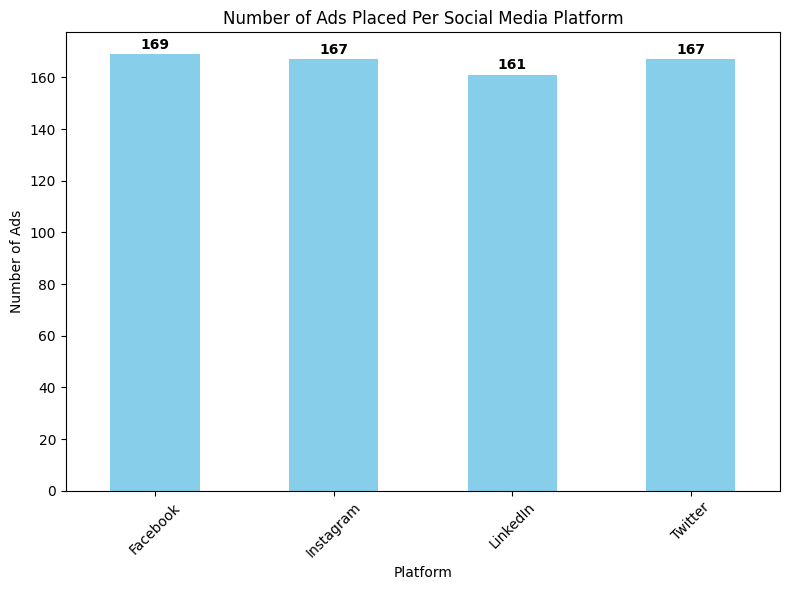

In [7]:
import matplotlib.pyplot as plt

# Count the number of ads per platform
ads_per_platform = data_cleaned.groupby('platform')['ad_id'].count()

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = ads_per_platform.plot(kind='bar', color='skyblue')

# Add value labels on top of each bar
for i, value in enumerate(ads_per_platform):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.title('Number of Ads Placed Per Social Media Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Ads')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


Descriptive Statistics for Impressions:
count       664.000000
mean     111767.756024
std       40888.521400
min           0.000000
25%       84289.000000
50%      110365.500000
75%      140006.750000
max      233660.000000
Name: impressions, dtype: float64


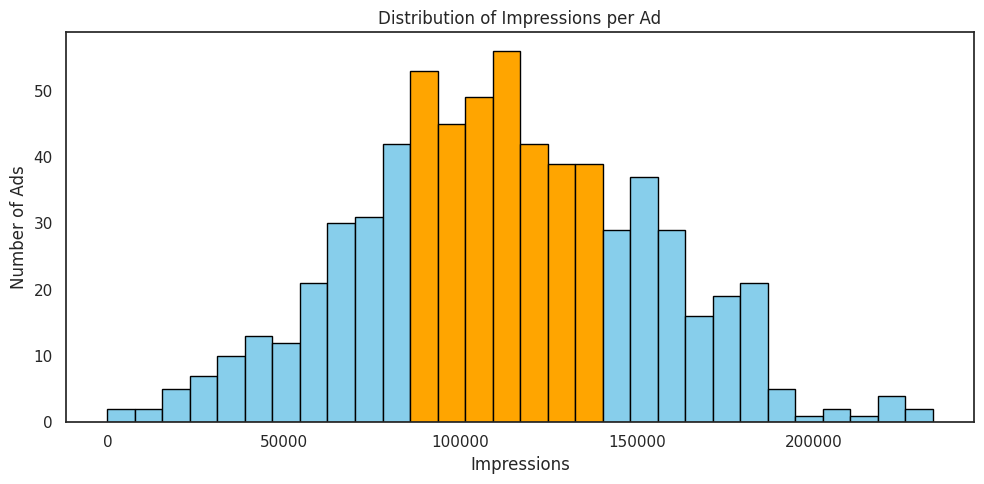

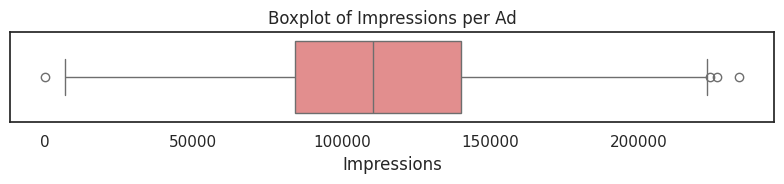

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Turn off seaborn grid styling
sns.set(style="white")

# Step 1: Descriptive stats
impressions = data_cleaned['impressions']
impressions_stats = impressions.describe()
print("Descriptive Statistics for Impressions:")
print(impressions_stats)

# Define interquartile range (IQR)
q1 = impressions.quantile(0.25)
q3 = impressions.quantile(0.75)

# Step 2: Custom histogram using matplotlib
plt.figure(figsize=(10, 5))

# Create histogram manually to customize colors
counts, bins, patches = plt.hist(impressions, bins=30, edgecolor='black')

# Color bars within the IQR range differently
for patch, bin_left in zip(patches, bins[:-1]):
    if q1 <= bin_left <= q3:
        patch.set_facecolor('orange')  # middle highlighted
    else:
        patch.set_facecolor('skyblue')  # outside range

# Customize the plot
plt.title('Distribution of Impressions per Ad')
plt.xlabel('Impressions')
plt.ylabel('Number of Ads')
plt.grid(False)  # Remove grid
plt.tight_layout()
plt.show()

# Step 3: Boxplot for spread (no grid)
plt.figure(figsize=(8, 2))
sns.boxplot(x=impressions, color='lightcoral')
plt.title('Boxplot of Impressions per Ad')
plt.xlabel('Impressions')
plt.grid(False)
plt.tight_layout()
plt.show()


Descriptive statistics for reach per platform:
           count          mean           std     min      25%      50%  \
platform                                                                 
Facebook   169.0  39280.005917  14626.979775  2424.0  29319.0  37836.0   
Instagram  167.0  47579.616766  17890.749670  4284.0  36185.5  45548.0   
LinkedIn   161.0  16495.142857   7204.371398     0.0  10712.0  15533.0   
Twitter    167.0  27591.185629  10723.275872  3319.0  19685.5  27831.0   

               75%       max  
platform                      
Facebook   50694.0   71308.0  
Instagram  57041.0  106707.0  
LinkedIn   21763.0   36798.0  
Twitter    33948.5   62572.0  


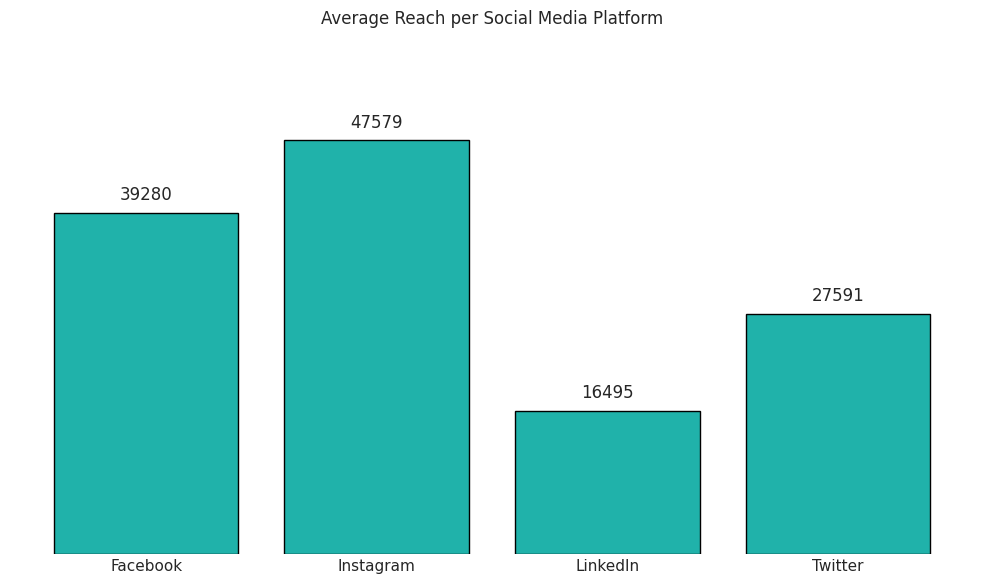

In [ ]:
# Descriptive statistics for reach per platform
reach_stats = df.groupby('platform')['reach'].describe()
print("Descriptive statistics for reach per platform:")
print(reach_stats)

# Bar chart for average reach per platform
avg_reach_per_platform = df.groupby('platform')['reach'].mean()

plt.figure(figsize=(10,6))
bars = plt.bar(avg_reach_per_platform.index, avg_reach_per_platform, color='lightseagreen', edgecolor='black')

# Set y-axis limit to 60000
plt.ylim(0, 60000)

# Remove top, left, right, and bottom borders (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove y-axis including ticks and labels
plt.gca().set_yticks([])

# Remove x-axis ticks but keep horizontal labels
plt.gca().set_xticks(range(len(avg_reach_per_platform))) 
plt.gca().set_xticklabels(avg_reach_per_platform.index, rotation=0)  
plt.tick_params(axis='x', length=0)  

# Add average reach above each bar (rounded for readability)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{int(height)}', ha='center', va='bottom')

plt.title('Average Reach per Social Media Platform')
plt.xlabel('')
plt.ylabel('')  
plt.tight_layout()
plt.show()

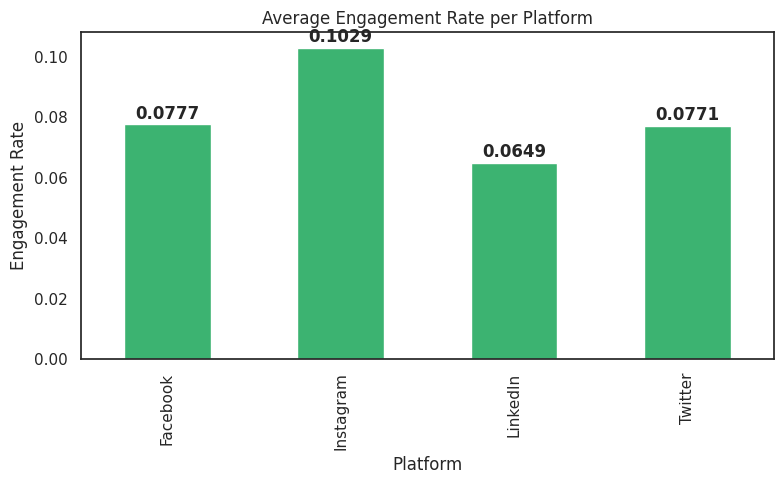

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Compute engagement rate for each ad
data_cleaned['engagement_rate'] = data_cleaned['engagements'] / data_cleaned['impressions']

# Step 2: Group by platform and calculate average engagement rate
engagement_rate_by_platform = data_cleaned.groupby('platform')['engagement_rate'].mean().round(4)

# Step 3: Plot the average engagement rate per platform
plt.figure(figsize=(8, 5))
bars = engagement_rate_by_platform.plot(kind='bar', color='mediumseagreen')

# Add value labels on top of bars
for i, value in enumerate(engagement_rate_by_platform):
    plt.text(i, value + 0.0005, f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.title('Average Engagement Rate per Platform')
plt.xlabel('Platform')
plt.ylabel('Engagement Rate')
plt.grid(False)
plt.tight_layout()
plt.show()


Maximum observed engagement rate (a): 0.1336


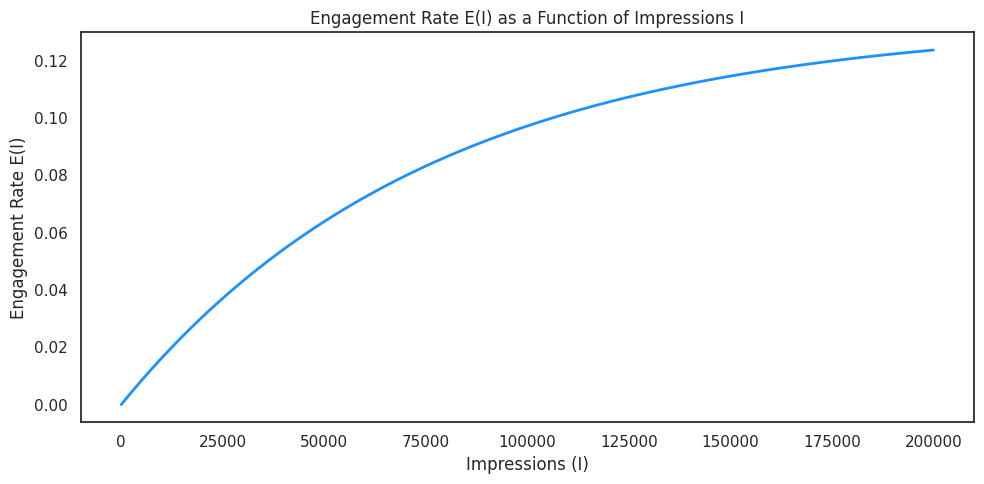

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Set known values
b = 0.000013

# Get the maximum engagement rate from the dataset (a)
a = data_cleaned['engagement_rate'].max()
print(f"Maximum observed engagement rate (a): {a:.4f}")

# Step 2: Define function E(I)
def engagement_rate_growth(I):
    return a * (1 - np.exp(-b * I))

# Step 3: Create a range of impressions
impressions = np.linspace(0, 200000, 500)  # 0 to 200,000 impressions

# Step 4: Compute engagement rates using the model
E_I = engagement_rate_growth(impressions)

# Step 5: Plot the function
plt.figure(figsize=(10, 5))
plt.plot(impressions, E_I, color='dodgerblue', linewidth=2)
plt.title('Engagement Rate E(I) as a Function of Impressions I')
plt.xlabel('Impressions (I)')
plt.ylabel('Engagement Rate E(I)')
plt.grid(False)
plt.tight_layout()
plt.show()


Descriptive Statistics for Click-Through Rate (CTR) per Platform:
           count      mean       std       min       25%       50%       75%  \
platform                                                                       
Facebook   169.0  0.060245  0.004963  0.044350  0.056881  0.059906  0.063717   
Instagram  167.0  0.075441  0.005108  0.061990  0.072067  0.075571  0.078347   
LinkedIn   161.0  0.025368  0.005550  0.011726  0.021830  0.025946  0.028617   
Twitter    167.0  0.045197  0.004949  0.030707  0.042030  0.045534  0.048526   

                max  
platform             
Facebook   0.074346  
Instagram  0.092554  
LinkedIn   0.042108  
Twitter    0.057804  


/tmp/ipykernel_11887/3075489868.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='ctr', data=data_cleaned, palette='Set2')


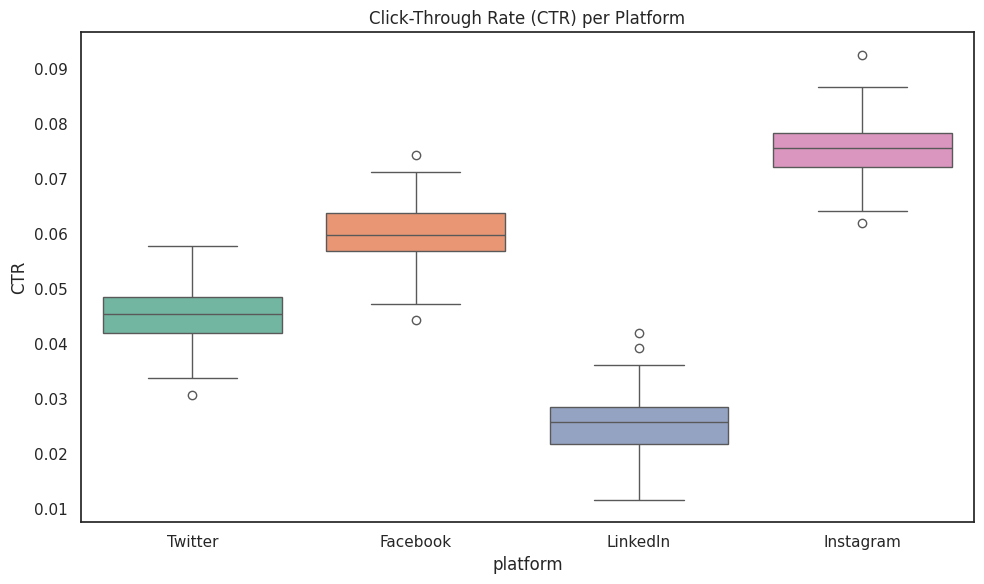


Hypothesis Test Result:
t-statistic: -47.3763
p-value: 0.0000
✅ Result: Statistically significant. LinkedIn CTR is lower than other platforms.


In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Descriptive statistics per platform
ctr_stats = data_cleaned.groupby('platform')['ctr'].describe()
print("Descriptive Statistics for Click-Through Rate (CTR) per Platform:")
print(ctr_stats)

# Step 2: Plot CTR distribution per platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='ctr', data=data_cleaned, palette='Set2')
plt.title('Click-Through Rate (CTR) per Platform')
plt.ylabel('CTR')
plt.grid(False)
plt.tight_layout()
plt.show()

# Step 3: Inferential analysis – one-sample t-test
# Manager claims LinkedIn CTR is significantly lower than others

# Get LinkedIn CTRs
linkedin_ctr = data_cleaned[data_cleaned['platform'] == 'LinkedIn']['ctr']

# Get CTRs from all other platforms
other_ctr = data_cleaned[data_cleaned['platform'] != 'LinkedIn']['ctr']

# Step 4: One-tailed t-test (LinkedIn CTR < others)
t_stat, p_value = stats.ttest_ind(linkedin_ctr, other_ctr, equal_var=False, alternative='less')

print(f"\nHypothesis Test Result:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation threshold
alpha = 0.05
if p_value < alpha:
    print("✅ Result: Statistically significant. LinkedIn CTR is lower than other platforms.")
else:
    print("❌ Result: Not statistically significant. No strong evidence that LinkedIn CTR is lower.")


Descriptive Statistics for CVR:
LinkedIn:
count    161.000000
mean       0.090158
std        0.002061
min        0.083980
25%        0.088559
50%        0.090108
75%        0.091741
max        0.095413
Name: cvr, dtype: float64

Twitter:
count    167.000000
mean       0.029868
std        0.002403
min        0.022800
25%        0.028001
50%        0.029871
75%        0.031622
max        0.036312
Name: cvr, dtype: float64


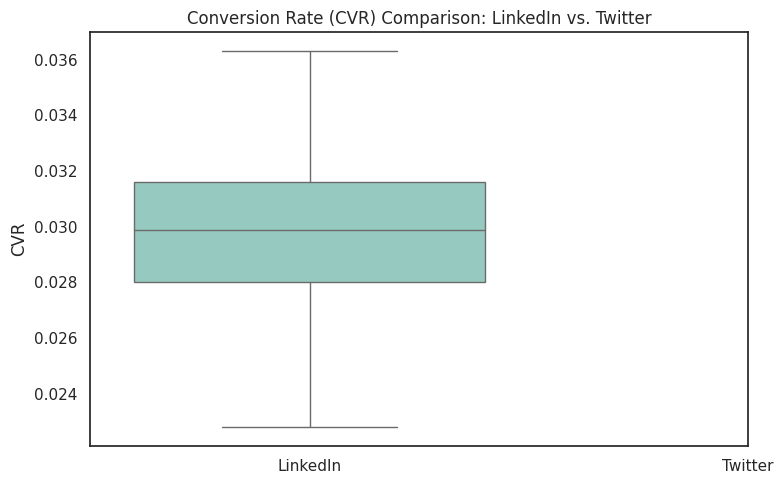


Hypothesis Test Result:
t-statistic: 244.1559
p-value: 0.0000
✅ Result: Statistically significant. LinkedIn CVR is higher than Twitter CVR.


In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get LinkedIn and Twitter CVR values
linkedin_cvr = data_cleaned[data_cleaned['platform'] == 'LinkedIn']['cvr']
twitter_cvr = data_cleaned[data_cleaned['platform'] == 'Twitter']['cvr']

# Step 2: Descriptive statistics
print("Descriptive Statistics for CVR:")
print("LinkedIn:")
print(linkedin_cvr.describe())
print("\nTwitter:")
print(twitter_cvr.describe())

# Step 3: Visual comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=[linkedin_cvr, twitter_cvr], palette='Set3')
plt.xticks([0, 1], ['LinkedIn', 'Twitter'])
plt.title('Conversion Rate (CVR) Comparison: LinkedIn vs. Twitter')
plt.ylabel('CVR')
plt.grid(False)
plt.tight_layout()
plt.show()

# Step 4: One-tailed t-test (LinkedIn > Twitter)
t_stat, p_value = stats.ttest_ind(linkedin_cvr, twitter_cvr, equal_var=False, alternative='greater')

print(f"\nHypothesis Test Result:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("✅ Result: Statistically significant. LinkedIn CVR is higher than Twitter CVR.")
else:
    print("❌ Result: Not statistically significant. No strong evidence that LinkedIn CVR is higher.")


In [21]:
import scipy.stats as stats
import numpy as np

# Step 1: Get Facebook CVR values
facebook_cvr = data_cleaned[data_cleaned['platform'] == 'Facebook']['cvr']

# Step 2: Calculate sample mean and standard error
sample_mean = facebook_cvr.mean()
sample_std = facebook_cvr.std(ddof=1)
n = len(facebook_cvr)
standard_error = sample_std / np.sqrt(n)

# Step 3: Calculate the 95% confidence interval
confidence = 0.95
df = n - 1  # degrees of freedom
t_critical = stats.t.ppf((1 + confidence) / 2, df)

margin_of_error = t_critical * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"📊 95% Confidence Interval for Facebook CVR: ({lower_bound:.5f}, {upper_bound:.5f})")


📊 95% Confidence Interval for Facebook CVR: (0.06970, 0.07032)


In [22]:
import scipy.stats as stats

# Given values
mean_cvr = 0.0812  # 8.12%
std_dev = 0.001

# Find z-score for the 90th percentile (top 10% performing)
z_score = stats.norm.ppf(0.90)

# Calculate the CVR threshold
cvr_cutoff = mean_cvr + z_score * std_dev

print(f"The CVR cutoff for the top 10% best-performing Facebook ads is: {cvr_cutoff:.5f}")


The CVR cutoff for the top 10% best-performing Facebook ads is: 0.08248


In [ ]:
from scipy.stats import norm

# Given or estimated values
mu = 0.1029          
sigma = 0.011        
threshold = 0.11     

# Step 1: Calculate Z-score
z = (threshold - mu) / sigma

# Step 2: Find the probability of exceeding this threshold
prob = 1 - norm.cdf(z)

print(f"Probability that a B-One ad exceeds 11% engagement rate: {prob:.4f}")


Probability that a B-One ad exceeds 11% engagement rate: 0.2593


In [24]:
from scipy.stats import norm

# Estimated values from data (adjust based on your stats)
mu_instagram = 0.0754  # mean CTR from Instagram
std_instagram = 0.0051

mu_facebook = 0.0602   # mean CTR from Facebook
std_facebook = 0.0050

# Threshold for "success" is 0.11
threshold = 0.11

# Calculate probabilities
prob_instagram = 1 - norm.cdf((threshold - mu_instagram) / std_instagram)
prob_facebook = 1 - norm.cdf((threshold - mu_facebook) / std_facebook)

print(f"Instagram P(success): {prob_instagram:.4f}")
print(f"Facebook P(success): {prob_facebook:.4f}")


Instagram P(success): 0.0000
Facebook P(success): 0.0000


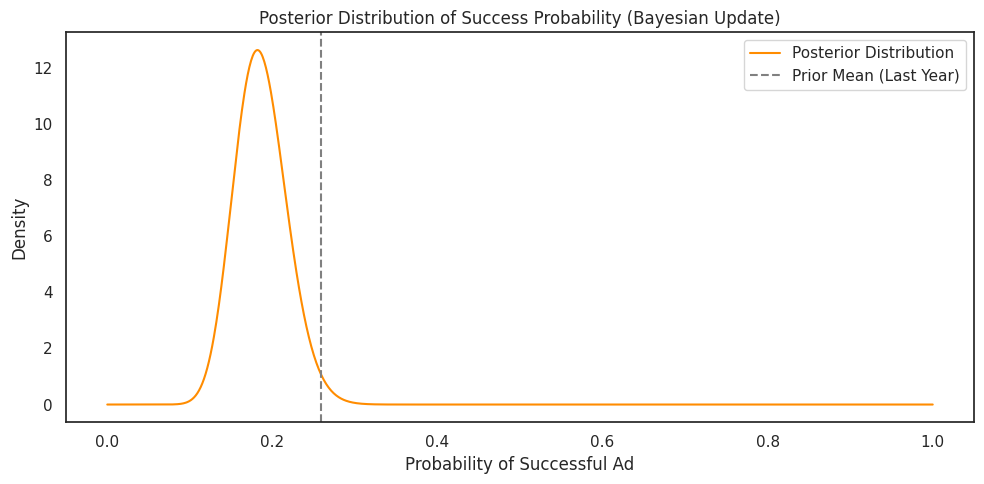

Updated probability (posterior mean): 0.1862


In [25]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

# Prior belief from last year
prior_p = 0.2593
k = 100  # strength of prior belief
alpha_prior = prior_p * k
beta_prior = (1 - prior_p) * k

# Observed data from this year
x = 2
n = 50

# Posterior parameters
alpha_post = alpha_prior + x
beta_post = beta_prior + (n - x)

# Plot the posterior distribution
x_vals = np.linspace(0, 1, 1000)
posterior_pdf = beta.pdf(x_vals, alpha_post, beta_post)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, posterior_pdf, label='Posterior Distribution', color='darkorange')
plt.axvline(x=prior_p, linestyle='--', color='gray', label='Prior Mean (Last Year)')
plt.title("Posterior Distribution of Success Probability (Bayesian Update)")
plt.xlabel("Probability of Successful Ad")
plt.ylabel("Density")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Posterior mean (updated estimate)
posterior_mean = alpha_post / (alpha_post + beta_post)
print(f"Updated probability (posterior mean): {posterior_mean:.4f}")


In [26]:
from scipy.stats import beta

# Use the posterior from Q4c: Beta(28, 122)
alpha_post = 28
beta_post = 122

# Calculate probability that p > 0.11
threshold = 0.11
prob_success_gt_11 = 1 - beta.cdf(threshold, alpha_post, beta_post)

print(f"Probability that the true success rate is more than 11%: {prob_success_gt_11:.4f}")


Probability that the true success rate is more than 11%: 0.9967


Ad fatigue starts after approximately day 12.00, with peak impressions at 7292.


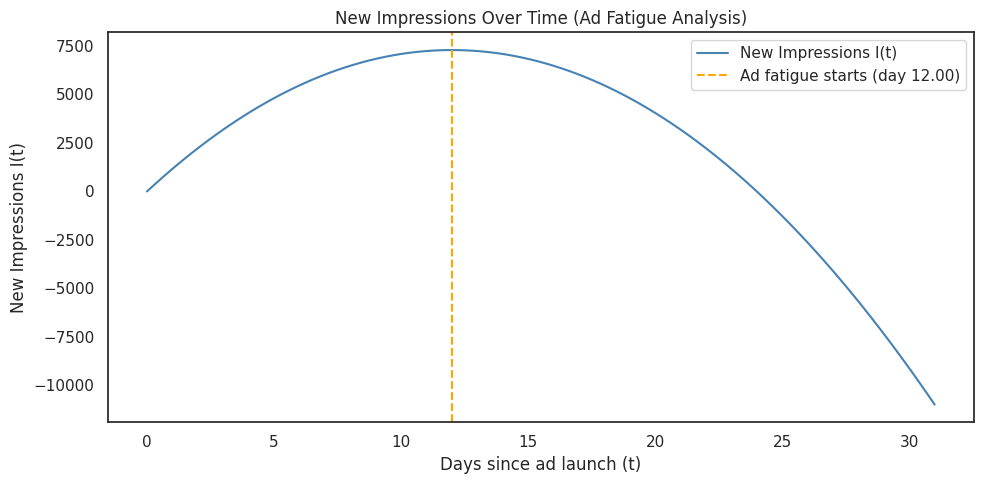

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients
a = -50.64
b = 1215.36

# Calculate the vertex (maximum point)
t_peak = -b / (2 * a)
I_peak = a * t_peak**2 + b * t_peak

print(f"Ad fatigue starts after approximately day {t_peak:.2f}, with peak impressions at {I_peak:.0f}.")

# Plotting
t = np.linspace(0, 31, 100)
I_t = a * t**2 + b * t

plt.figure(figsize=(10, 5))
plt.plot(t, I_t, label="New Impressions I(t)", color="steelblue")
plt.axvline(x=t_peak, linestyle='--', color='orange', label=f"Ad fatigue starts (day {t_peak:.2f})")
plt.title("New Impressions Over Time (Ad Fatigue Analysis)")
plt.xlabel("Days since ad launch (t)")
plt.ylabel("New Impressions I(t)")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [28]:
from scipy.integrate import quad

# Define the impressions function
def I(t):
    return -50.64 * t**2 + 1215.36 * t

# Integrate from day 0 to day 12
total_impressions, _ = quad(I, 0, 12)

print(f"Total impressions generated before ad fatigue: {total_impressions:.0f}")


Total impressions generated before ad fatigue: 58337
